In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
home_data = pd.read_csv('housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


<Axes: xlabel='longitude', ylabel='latitude'>

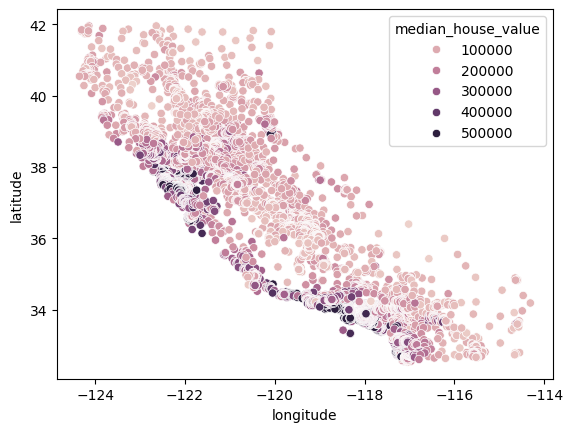

In [3]:
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

In [5]:
normalized_data = preprocessing.normalize(home_data[['latitude', 'longitude']])
print(normalized_data)

[[ 0.29601821 -0.9551823 ]
 [ 0.29589769 -0.95521964]
 [ 0.29578221 -0.9552554 ]
 ...
 [ 0.30932376 -0.95095679]
 [ 0.30909316 -0.95103176]
 [ 0.30885191 -0.95111014]]


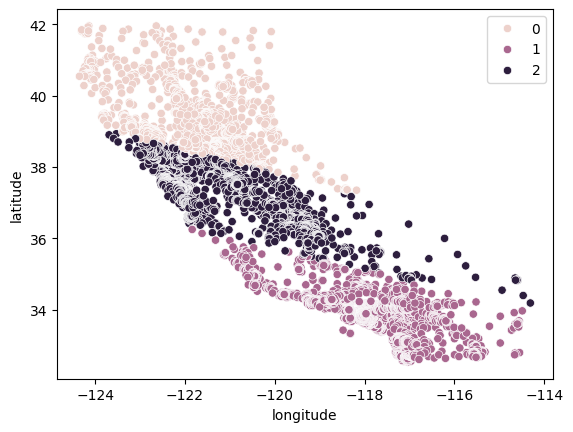

In [10]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(normalized_data)
sns.scatterplot(data=home_data[['latitude', 'longitude']], x = 'longitude', y = 'latitude', hue = kmeans.labels_)
plt.show()

In [11]:
centers = kmeans.cluster_centers_
print("centers", centers)

centers [[ 0.30669579 -0.95179304]
 [ 0.27599312 -0.96115425]
 [ 0.29454447 -0.95563289]]


In [16]:
print(silhouette_score(normalized_data, kmeans.labels_, metric='euclidean'))

0.7498979586241605
